# 01-Construction of pRM4e_PkasO capture plasmid

In order to clone all the regulators into an integrative vector using a standardized cloning framework, the existing pRM4e plasmid needs to be adjusted. This will result in  , a plasmid with pKaso* + RBS flanked by a StuI restriction site for easy linearization for Gibson Assemblies. 

This notebook will: 
1. Amplify pRM4e with pKaso* + RBS flanked by a StuI restriction
2. Verify it by gel electrophoresis
3. Transform e.coli with the new plasmid
4. Perform colony pcr to verify correct plasmid
5. Make O/N cultures for subsequent miniprep
6. Send the new plasmid for sequencing

In [124]:
from teemi.design.fetch_sequences import read_genbank_files
import pandas as pd
from pydna.dseqrecord import Dseqrecord

In [126]:
base_plasmid = read_genbank_files('data_for_tf_activation_project/plasmids/prm4e.gb')[0]
base_plasmid = Dseqrecord(base_plasmid, circular = True)

30/11/2023



Two PCRs were set up: 


In [127]:
from pydna.primer import Primer
from pydna.amplify import pcr


In [128]:
CW958_prM4e_kasO_rev = Primer('acgACTTTAcaacaccgcacagcatgtTGTCAAagcagagacggttcgaatgtgaacaattgcgttgcgctcactgcc')
CW959_pRM4e_kasO_fwd = Primer('gtgcggtgttgTAAAGTcgtggccATCTAGTCCATGGCGAGCAACGGAGGTACGGACAGGCCTtccgttcgagtggcggcttgc')

In [129]:
from Bio.Seq import Seq

In [130]:
CW947_rev = Primer('cgaacggacactcgcatggac')
CW949_rev = Primer('ccttattcgcacctggcggtgc')

pCW948_fwd = Primer('gcaccgccaggtgcgaataagg')

In [131]:
CW947_rev

id 21-mer:5'-cgaacggacactcgc..gac-3'

#### Simulating the PCR

In [132]:
Frag1 = pcr(CW959_pRM4e_kasO_fwd, 
            CW949_rev, 
            base_plasmid)

Frag1

Amplicon(2775)

In [133]:
Frag2 = pcr(CW958_prM4e_kasO_rev, 
            pCW948_fwd, 
            base_plasmid)
Frag2

Amplicon(2515)

In [134]:
from teemi.build.PCR import calculate_volumes

In [135]:
calculate_volumes(vol_p_reac = 50, 
        no_of_reactions = 3,
        standard_reagents = ["Template", "Primer 1", "Primer 2", "H20", "Q5 (GC)"],
        standard_volumes = [1, 2.5, 2.5, 19, 25])

vol_p_reac  vol_p_3_reac
Template         1.0           3.0
Primer 1         2.5           7.5
Primer 2         2.5           7.5
H20             19.0          57.0
Q5 (GC)         25.0          75.0
Total           50.0         150.0

Remember the rigt primers

#### Simulating the gel: 

2775bp_PCR_prod
2515bp_PCR_prod


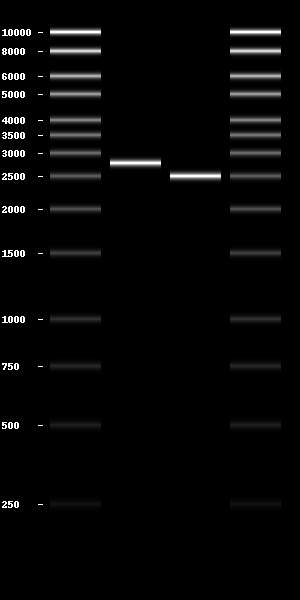

In [136]:

import pydna.gel
bands = [Frag1, Frag2]
for band in bands:
    print(band.name)
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands], pydna.ladders.GeneRuler_1kb])

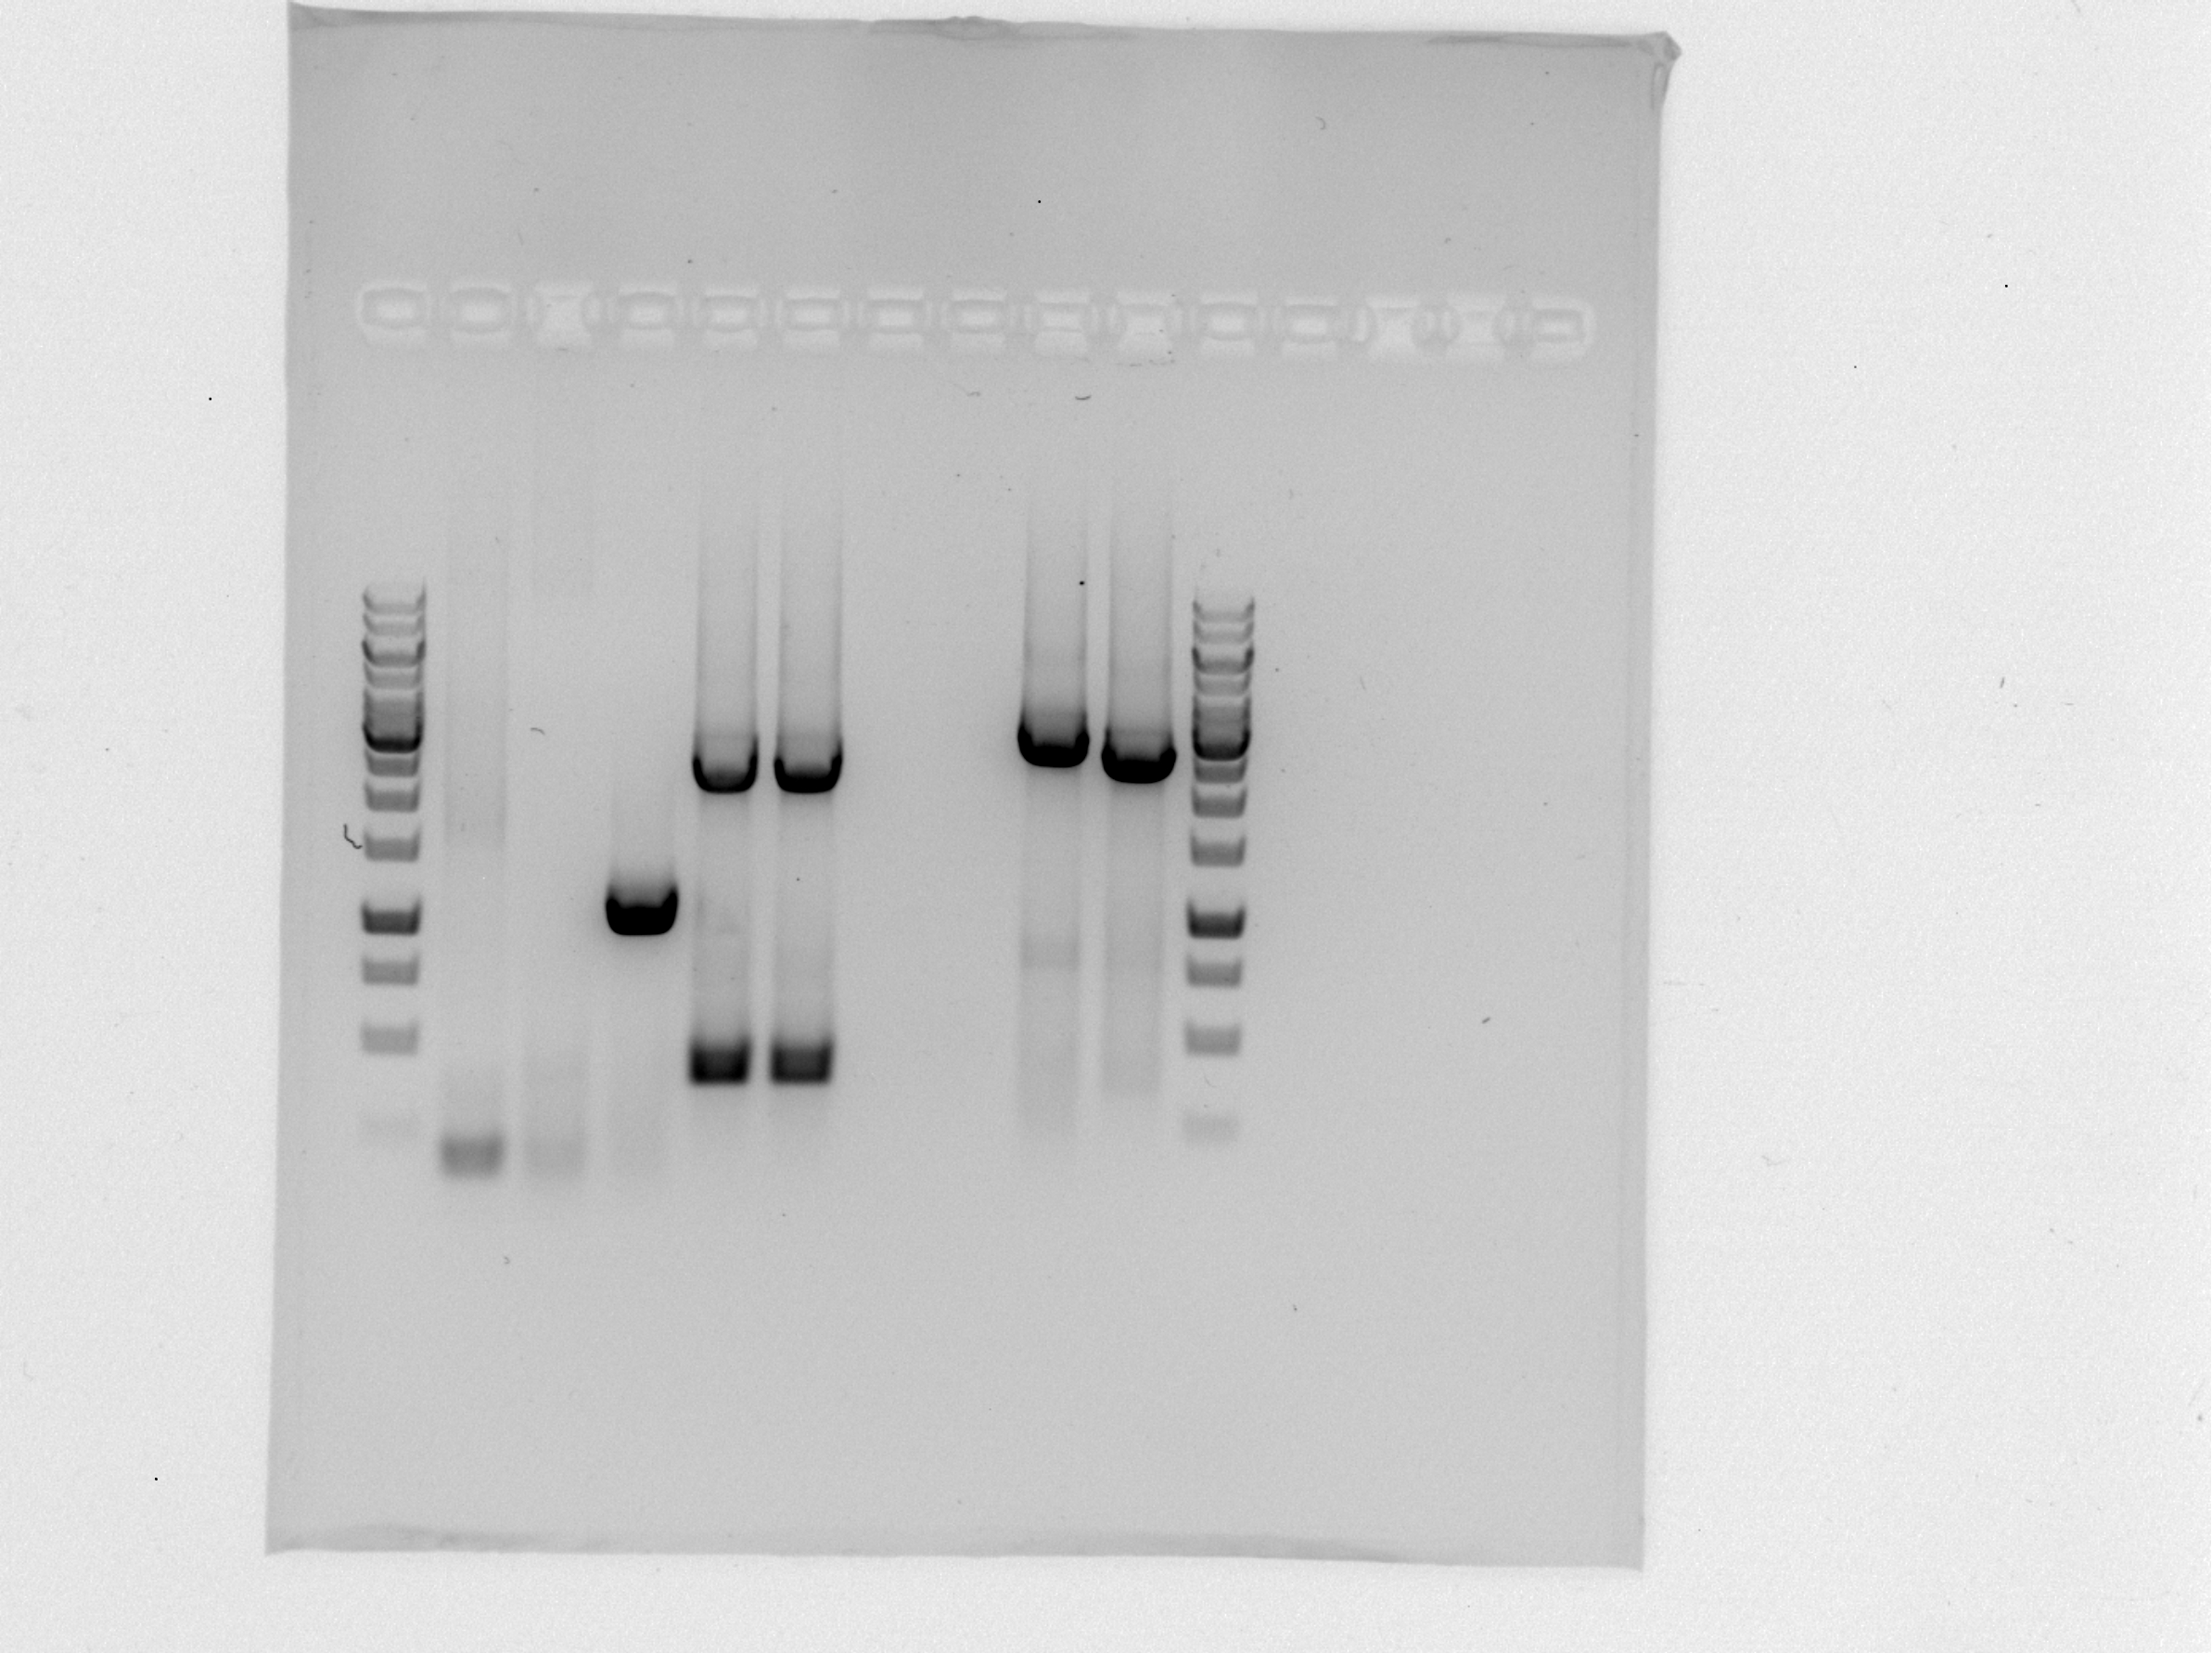

In [137]:
path_to_gel = 'data_for_tf_activation_project/bioimager/2023-11-29_10h58m57s_Frag1_pBase_fragments_pRM4e_Lucas.jpg'
from IPython.display import Image
Image(filename=path_to_gel) 


Our bands are the two last on the right. They look correct. Lets proceed. 


Gel clean up of the two fragments: 

In [138]:
p270_frag1_conc = 4.3
p270_frag2_conc = 6.2

In [139]:
#Equimolar masses 
equimolar_mass_of_both_fragments = 28

assembly_of_p270 = pd.DataFrame({'DNA':['p270_frag1','p270_frag2' ], 
                                 'size(bp)':[len(Frag1), len(Frag2)], 
                                 'conc_(ng/µL)': [4.3, 6.2], 
                                 'equimolar masses (ng)': [equimolar_mass_of_both_fragments, equimolar_mass_of_both_fragments*(len(Frag2)/len(Frag1))  ]
                                 
                                 })

assembly_of_p270['volume (µL)'] = [(list(assembly_of_p270['equimolar masses (ng)'])[i]/list(assembly_of_p270['conc_(ng/µL)'])[i]) for i in range(len(assembly_of_p270))]

total_volume_of_fragments = assembly_of_p270['volume (µL)'].sum()

print(f'total_volume_of_fragments : {total_volume_of_fragments}')
print(f'HIFI_mastermix_to_add : {10-total_volume_of_fragments}')
assembly_of_p270


total_volume_of_fragments : 10.604624129005224
HIFI_mastermix_to_add : -0.6046241290052237


DNA  size(bp)  conc_(ng/µL)  equimolar masses (ng)  volume (µL)
0  p270_frag1      2775           4.3              28.000000     6.511628
1  p270_frag2      2515           6.2              25.376577     4.092996

The Gibson Assembly was incubated at 50 C for 1 h.

Afterwards, 5 ul of the assembly was transformed into E. coli Mach1 using the standard heatshock protocol, and spread on LB + Apr plates. 


01.12.2023


Transformation resulted in a handfull of colonies. These were picked and screened with the following PCR; 

### Colony PCR - Screening of correct plasmids

In [140]:
calculate_volumes(vol_p_reac = 10, 
        no_of_reactions = 17,
        standard_reagents = ["Template", "CW759", "CW748", "H20", "Q5 (GC)"],
        standard_volumes = [1, 0.5, 0.5, 3, 5])

vol_p_reac  vol_p_17_reac
Template         1.0           17.0
CW759            0.5            8.5
CW748            0.5            8.5
H20              3.0           51.0
Q5 (GC)          5.0           85.0
Total           10.0          170.0

Used the following touchdown PCR 

tm = 68, 66, 62

In [144]:
#Assembled_plasmid
p270_prm4e_pkaso_rbs = read_genbank_files('data_for_tf_activation_project/plasmids/p270_prm4e-pkaso-rbs.gb')[0]
p270_prm4e_pkaso_rbs = Dseqrecord(p270_prm4e_pkaso_rbs, circular = True)

# simulating the pcr
colony_pcr_pkaso_rbs = pcr(CW959_pRM4e_kasO_fwd, CW949_rev, p270_prm4e_pkaso_rbs)
colony_pcr_pkaso_rbs


Amplicon(2757)

So the bands should be around 2757 bp

Running the gel at 100V for 30 min

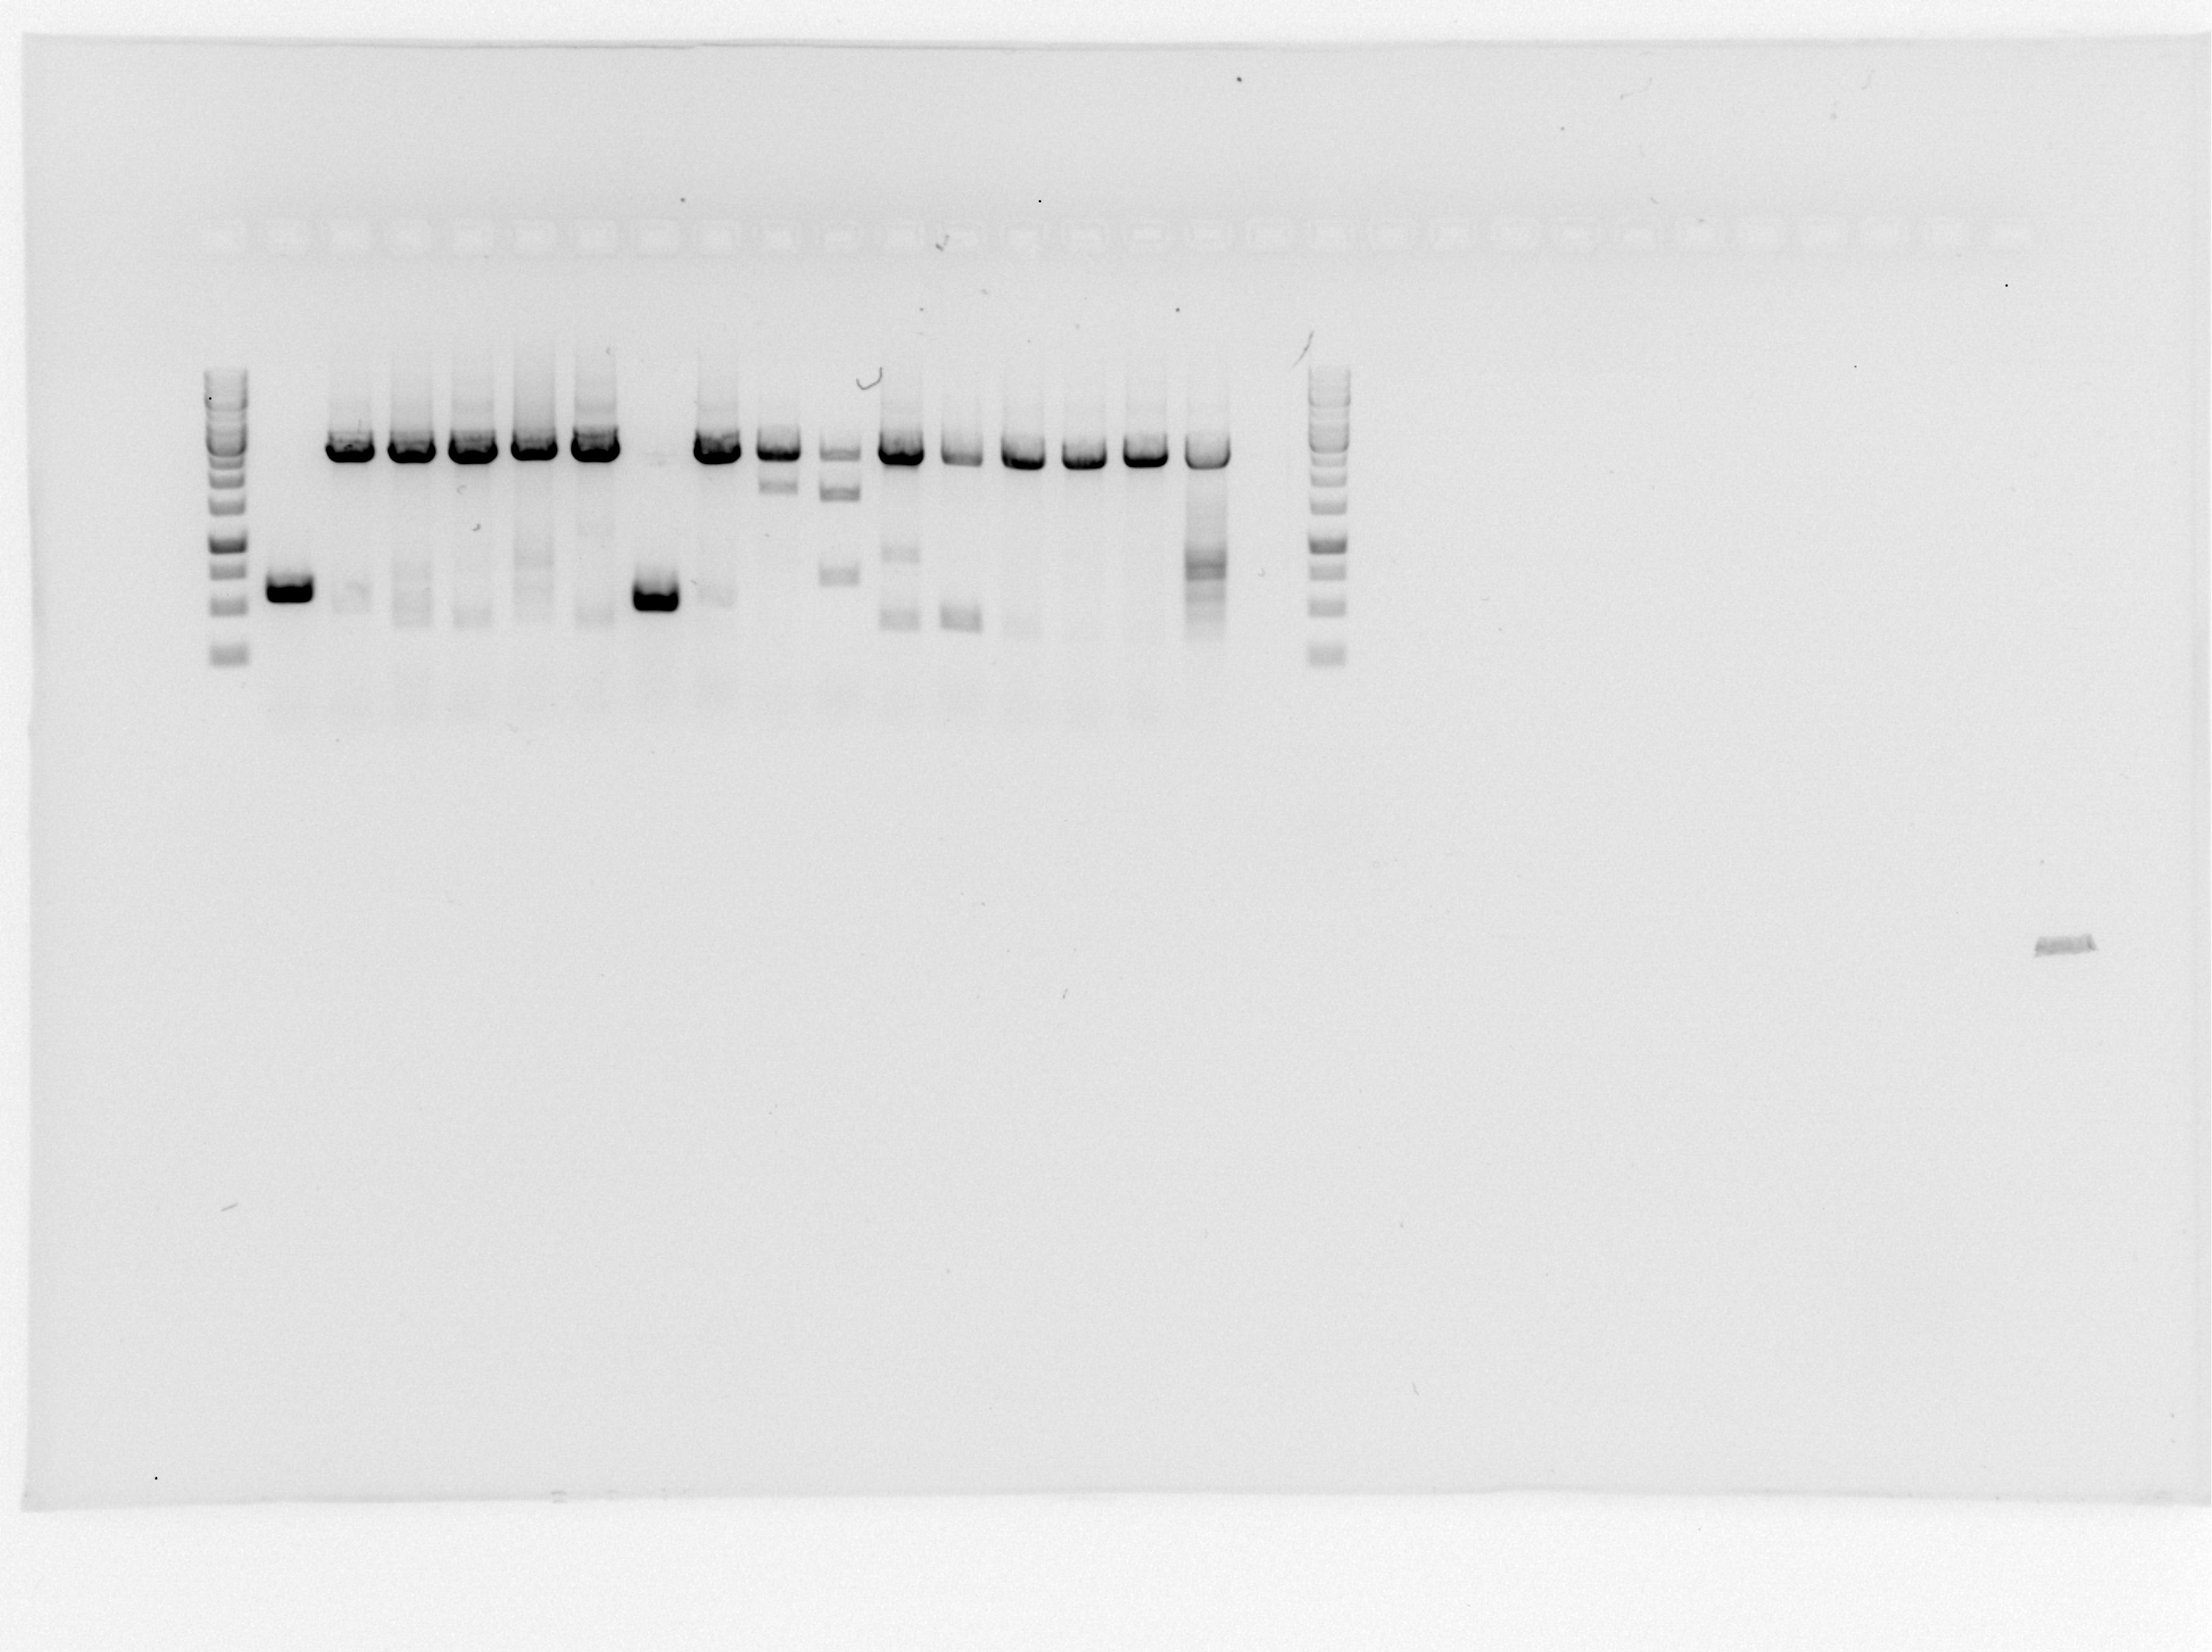

In [146]:
path_to_gel = 'data_for_tf_activation_project/bioimager/2023-12-01_15h33m27s_Colony_PCR_p270.jpg'
from IPython.display import Image
Image(filename=path_to_gel) 

I chose to make O/N cultures for: 



- Col 2
- col 3
- col 4
- col6
- col 10

05.12.23

#### Minipreps
For the minipreps, I put the A1 buffer in cold room outside of my normal storage box. My storage is second row on the left, lowest shelf (where all the shake flasks are standing). You can just use the plasmid easy prep kit that is in my cupboard.


After retrying the minipreps, I got the following yields: 


In [148]:
col2 =	53.6
col3 = 	45.2
col4= 	37.8
col6= 	72.1
col10= 	28.5

Results from the sequencing:

| name         | mix2seq number | Results                       |
|--------------|----------------|-------------------------------|
| col 2        | EF71425543     | Good, use for glycerol stocks |
| col 3        | EF71425544     | mixed peaks, bad qual         |
| col 4        | EF71425545     | mixed peaks, bad qual         |
| col 6        | EF71425546     | mixed peaks, bad qual         |
| col 10       | EF71425547     | mixed peaks, bad qual         |

Will make glycerol stocks for col2

This finishes this notebook